# **Recreate Graph Part 2 (Core)**
**Student**: Michael McCann <br>
**Date**: 12 FEB 2022

In [1]:
## Load Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## Import libraries
import numpy as np
import pandas as pd     
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## Load Data: 
filepath = "/content/drive/MyDrive/Data/mortgages.csv"
mort_df = pd.read_csv(filepath)

In [8]:
display(mort_df.head())
mort_df.info()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1080 non-null   int64  
 1   Starting Balance  1080 non-null   float64
 2   Repayment         1080 non-null   float64
 3   Interest Paid     1080 non-null   float64
 4   Principal Paid    1080 non-null   float64
 5   New Balance       1080 non-null   float64
 6   Mortgage Name     1080 non-null   object 
 7   Interest Rate     1080 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 67.6+ KB


In [73]:
filter_30y = mort_df['Mortgage Name'] == "30 Year"
filter_5perc = mort_df['Interest Rate'] == 0.05
filter_3perc = mort_df['Interest Rate'] == 0.03

mort30y5p = mort_df[filter_30y & filter_5perc].reset_index(drop = True)
mort30y3p = mort_df[filter_30y & filter_3perc].reset_index(drop = True)

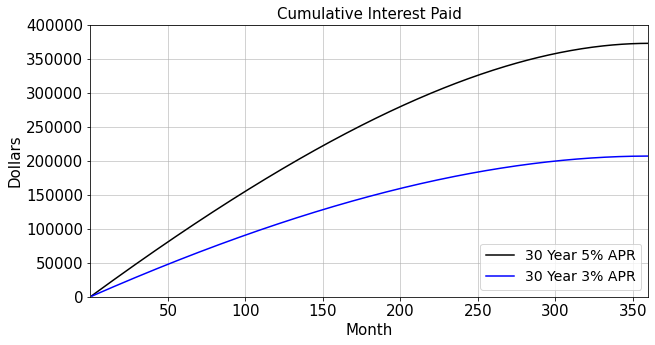

In [74]:
plt.figure(figsize = (10,5))
plt.plot(mort30y5p['Month'], mort30y5p['Interest Paid'].cumsum(), color = 'k', label = '30 Year 5% APR')
plt.plot(mort30y3p['Month'], mort30y3p['Interest Paid'].cumsum(), color = 'b', label = '30 Year 3% APR')
plt.grid(alpha = .7)
plt.xlim(left=0, right=360)
plt.ylim(bottom=0, top =400000)
plt.xticks([50, 100, 150, 200, 250, 300, 350], fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc=4, fontsize = 14)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Dollars', fontsize = 15)
plt.title('Cumulative Interest Paid', fontsize = 15);

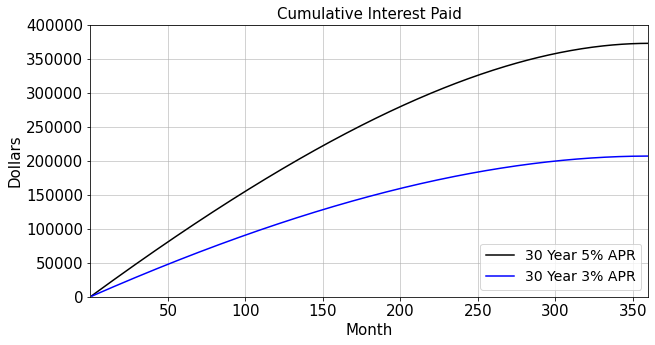

In [121]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )
ax.plot(mort30y5p['Month'], mort30y5p['Interest Paid'].cumsum(), c = 'k', label = '30 Year 5% APR')
ax.plot(mort30y3p['Month'], mort30y3p['Interest Paid'].cumsum(), color = 'b', label = '30 Year 3% APR');
plt.grid(alpha = .7)
plt.xlim(left=0, right=360)
plt.ylim(bottom=0, top =400000)
plt.xticks([50, 100, 150, 200, 250, 300, 350], fontsize = 15)
plt.yticks(fontsize = 15)
ax.legend(loc=4, fontsize = 14)
#ax.set(xlabel='Month', ylabel="Dollars",title= "Cumulative Interest Paid"); ## CANT SET FONTSIZE????
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('Dollars', fontsize = 15)
ax.set_title('Cumulative Interest Paid', fontsize = 15);
